In [0]:
from keras.layers import Dense, Input
from keras.models import Model, K
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [0]:
(x_train, y_train),(_,_) = mnist.load_data()
#load_data has things in tuple.First tuple takes data

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
X = x_train.reshape((-1,28*28))
# -1 will take care of the third dimension
X = X/255.

In [0]:
X.shape

(60000, 784)

In [0]:
input_layer = Input(shape=[28*28])
x = Dense(300,activation='relu')(input_layer)
x = Dense(100, activation='relu')(x)
x = Dense(10)(x)
x = Dense(100,activation='relu')(x)
x = Dense(300,activation='relu')(x)
output_layer = Dense(784)(x)
simple_autoencoder = Model(input_layer, output_layer)
simple_autoencoder.compile(optimizer='adam',loss='mean_squared_error')
simple_autoencoder.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_5 (Dense)              (None, 300)               30300     
_________________________________________________________________
dens

In [0]:
simple_autoencoder.fit(x=X,y=X,batch_size=32,epochs=20,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 11s 231us/step - loss: 0.0288 - val_loss: 0.0228
Epoch 2/20
48000/48000 [==============================] - 10s 217us/step - loss: 0.0217 - val_loss: 0.0207
Epoch 3/20
48000/48000 [==============================] - 10s 213us/step - loss: 0.0201 - val_loss: 0.0199
Epoch 4/20
48000/48000 [==============================] - 10s 212us/step - loss: 0.0192 - val_loss: 0.0192
Epoch 5/20
48000/48000 [==============================] - 10s 211us/step - loss: 0.0186 - val_loss: 0.0187
Epoch 6/20
48000/48000 [==============================] - 10s 210us/step - loss: 0.0182 - val_loss: 0.0182
Epoch 7/20
48000/48000 [==============================] - 10s 211us/step - loss: 0.0178 - val_loss: 0.0179
Epoch 8/20
48000/48000 [==============================] - 10s 211us/step - loss: 0.0175 - val_loss: 0.0177
Epoch 9/20
48000/48000 [======================

In [0]:
x1 = simple_autoencoder.predict(X[7].reshape((1,784)))

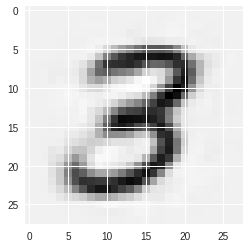

In [0]:
plt.imshow(x1.reshape((28,28)))

Apply the above technique with CNN

In [0]:
from keras.layers import Conv2D, MaxPool2D, Input, Dense, Flatten, Dropout
from keras.models import Model, K
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [0]:
K.clear_session()
inp = Input(shape = [150,150,3], dtype = np.float32)
x = Conv2D(filters = 32, kernel_size = (3,3), strides = 1, padding = 'same', activation = 'relu')(inp)
x = MaxPool2D(pool_size = (2,2), strides = 1, padding = 'same')(x)
x = Conv2D(filters = 48, kernel_size = (3,3), strides = 2, padding = 'valid', activation = 'relu')(x)
x = MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same')(x)
x = Conv2D(filters = 64, kernel_size = (3,3), strides = 2, padding = 'valid', activation = 'relu')(x)
x = MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same')(x)
x = Flatten()(x)
x = Dense(units = 128, activation = 'relu')(x)
out = Dense(1, activation = 'sigmoid')(x)
model = Model(inp, out)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 74, 74, 48)        13872     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        27712     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 9, 64)          0         
__________